In [1]:
import os, shutil, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization

In [2]:
train_dir = 'Human_Face_Regonition_Images\\split2\\train'
validation_dir = 'Human_Face_Regonition_Images\\split2\\validation'
test_dir = 'Human_Face_Regonition_Images\\split2\\test'

In [3]:
data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        horizontal_flip=True,)
                                        
train_generator_aug = data_gen_aug.flow_from_directory(train_dir, target_size=(256, 256), batch_size=128)

validation_generator_aug = data_gen_aug.flow_from_directory(validation_dir, target_size=(256, 256), batch_size=128)

test_generator_aug = data_gen_aug.flow_from_directory(test_dir, target_size=(256, 256), batch_size=128)

Found 16000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 3108 images belonging to 5 classes.


In [4]:
import lime
from lime import lime_image

In [6]:
best_cnn_model = models.load_model('models/pretrained_model.h5')

In [ ]:
best_cnn_model

In [10]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

explainer = lime_image.LimeImageExplainer()
# segmenter = SegmentationAlgorithm('slic', n_segments=100, compactness=1, sigma=1)

img, label = train_generator_aug.next()


In [11]:
img.shape

(128, 256, 256, 3)

In [32]:
explanation = explainer.explain_instance(img[0].astype('double'), 
                                         best_cnn_model.predict, 
                                         )

100%|██████████| 1000/1000 [00:18<00:00, 55.48it/s]


100%|██████████| 1000/1000 [01:51<00:00,  9.01it/s]


ValueError: Invalid integer data type 'f'.

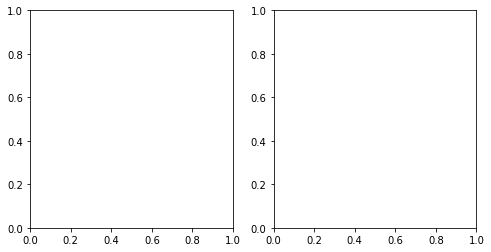

In [10]:
from skimage.color import label2rgb
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

img, label = train_generator_aug.next()

explanation = explainer.explain_instance(img[0].astype('double'), 
                                            best_cnn_model.predict)

y_pred=best_cnn_model.predict(img) 
classes_x=np.argmax(y_pred, axis=1)

temp, mask = explanation.get_image_and_mask(classes_x[0], positive_only=True, num_features=5, hide_rest=False)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(mark_boundaries(mask,temp), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(classes_x[0]))
temp, mask = explanation.get_image_and_mask(classes_x[0], positive_only=False, num_features=10, hide_rest=False)
ax2.imshow(mark_boundaries(3-mask,temp), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(classes_x[0]))

100%|██████████| 1000/1000 [01:38<00:00, 10.16it/s]


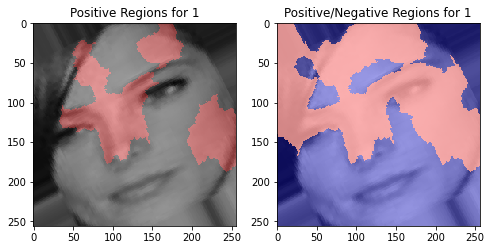

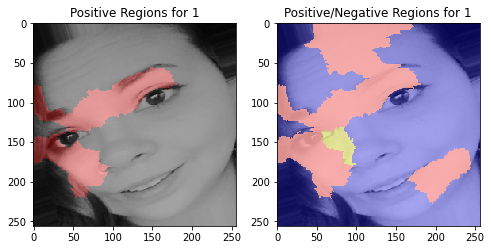

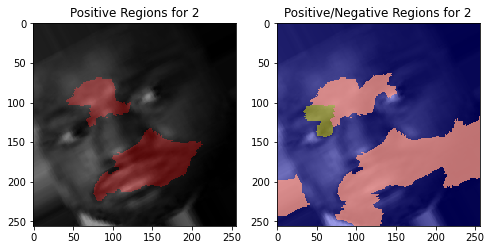

In [11]:
from skimage.color import label2rgb
from skimage.segmentation import mark_boundaries

for n in range(3):
    explainer = lime_image.LimeImageExplainer()

    img, label = train_generator_aug.next()

    explanation = explainer.explain_instance(img[0].astype('double'), 
                                            best_cnn_model.predict)

    y_pred=best_cnn_model.predict(img) 
    classes_x=np.argmax(y_pred, axis=1)

    temp, mask = explanation.get_image_and_mask(classes_x[0], positive_only=True, num_features=5, hide_rest=False)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
    ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    ax1.set_title('Positive Regions for {}'.format(classes_x[0]))
    temp, mask = explanation.get_image_and_mask(classes_x[0], positive_only=False, num_features=10, hide_rest=False)
    ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
    ax2.set_title('Positive/Negative Regions for {}'.format(classes_x[0]))


In [2]:
model = models.load_model('baseline_model.h5')

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               25165952  
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 6)                

In [4]:
cnn_model_1 = models.load_model('cnn_model_1.h5')

In [5]:
cnn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)      

In [5]:
aug_model = models.load_model('aug_baseline_model.h5')
aug_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               25165952  
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 6)                

In [ ]:
aug_model.predict()

In [11]:
best_cnn_model = models.load_model('aug_cnn_model_4_drop.h5')
best_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0

In [4]:
history = best_cnn_model.history
history